In [3]:
# Necessary imports:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

In [4]:
# Load in the Uniform Crime Reporting Dataset (UCR)
ucr = pd.read_csv('/Users/adibronshtein/Documents/Datasets/Capstone/UCR1965_2015.csv')

## Uniform Crime Reporting Dataset EDA

In [52]:
ucr.head()

,ORI,Name,YEAR,MRD,CLR,State,County,Agency
0,AK00101,ANCHORAGE,1965,7,6,Alaska,"Anchorage, AK",Anchorage
1,AK00101,ANCHORAGE,1966,18,16,Alaska,"Anchorage, AK",Anchorage
2,AK00101,ANCHORAGE,1967,1,1,Alaska,"Anchorage, AK",Anchorage
3,AK00101,ANCHORAGE,1968,7,5,Alaska,"Anchorage, AK",Anchorage
4,AK00101,ANCHORAGE,1969,7,4,Alaska,"Anchorage, AK",Anchorage


In [5]:
ucr.tail()

,ORI,Name,YEAR,MRD,CLR,State,County,Agency
153271,WYDI050,WIND RIVER TRIBAL,2008,2,0,Wyoming,"Fremont, WY",Wind River Agency
153272,WYDI050,WIND RIVER AGENCY,2011,3,0,Wyoming,"Fremont, WY",Wind River Agency
153273,WYDI050,WIND RIVER AGENCY,2013,1,1,Wyoming,"Fremont, WY",Wind River Agency
153274,WYDI050,WIND RIVER AGENCY,2014,3,3,Wyoming,"Fremont, WY",Wind River Agency
153275,WYDI050,WIND RIVER AGENCY,2015,1,1,Wyoming,"Fremont, WY",Wind River Agency


In [14]:
# Because the Supplementary Homicide Report begins from 1976, 
#I would work from this year forward in the Uniform Crime Reporting Dataset
ucr = ucr[ucr.YEAR >= 1976]

In [82]:
# After changing 
ucr.head()

,ORI,Name,YEAR,MRD,CLR,State,County,Agency
11,AK00101,ANCHORAGE,1976,15,5,Alaska,"Anchorage, AK",Anchorage
12,AK00101,ANCHORAGE,1977,13,7,Alaska,"Anchorage, AK",Anchorage
13,AK00101,ANCHORAGE,1978,16,13,Alaska,"Anchorage, AK",Anchorage
14,AK00101,ANCHORAGE,1979,16,9,Alaska,"Anchorage, AK",Anchorage
15,AK00101,ANCHORAGE,1980,15,8,Alaska,"Anchorage, AK",Anchorage


In [83]:
ucr.tail()

,ORI,Name,YEAR,MRD,CLR,State,County,Agency
153271,WYDI050,WIND RIVER TRIBAL,2008,2,0,Wyoming,"Fremont, WY",Wind River Agency
153272,WYDI050,WIND RIVER AGENCY,2011,3,0,Wyoming,"Fremont, WY",Wind River Agency
153273,WYDI050,WIND RIVER AGENCY,2013,1,1,Wyoming,"Fremont, WY",Wind River Agency
153274,WYDI050,WIND RIVER AGENCY,2014,3,3,Wyoming,"Fremont, WY",Wind River Agency
153275,WYDI050,WIND RIVER AGENCY,2015,1,1,Wyoming,"Fremont, WY",Wind River Agency


In [84]:
# Check for missing values
ucr.isnull().sum()

ORI       0
Name      0
YEAR      0
MRD       0
CLR       0
State     0
County    0
Agency    0
dtype: int64

In [24]:
# Create a column with the percentage of cleared cases (cleared divided by murders)
ucr['clr_percent'] = ucr['CLR']/ucr['MRD']

/Users/adibronshtein/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [25]:
ucr['clr_percent']

11        0.333333
12        0.538462
13        0.812500
14        0.562500
15        0.533333
16        0.722222
17        0.500000
18        0.750000
19        0.875000
20        0.714286
21        0.470588
22        0.466667
23        0.692308
24        1.090909
25        0.700000
26        0.360000
27        0.529412
28        0.565217
29        0.636364
30        0.655172
31        0.640000
32        0.913043
33        0.578947
34        0.526316
35        0.900000
36        0.800000
37        1.055556
38        0.529412
39        0.933333
40        0.625000
            ...   
153241    0.500000
153242    0.000000
153243    1.000000
153244    0.000000
153245    0.500000
153246         inf
153247         inf
153248    1.500000
153249         inf
153252    1.000000
153253    1.000000
153254    1.000000
153255    1.000000
153256    1.000000
153257    1.000000
153260    1.000000
153261    1.000000
153262    1.000000
153264    0.000000
153265    1.000000
153266    0.000000
153267      

In [15]:
# Sum of all murders from 1976 to 2015 (including)
ucr.MRD.sum()

721907

In [26]:
# Sum of all cleared cases from 1976 to 2015 (including)
ucr.CLR.sum()

461987

In [98]:
# Murders by year
ucr.groupby('YEAR').MRD.sum()

YEAR
1976    18101
1977    18740
1978    19366
1979    21093
1980    22454
1981    21733
1982    20392
1983    18758
1984    17470
1985    18510
1986    20103
1987    19492
1988    18481
1989    20855
1990    22771
1991    23957
1992    23016
1993    23402
1994    22185
1995    20365
1996    17978
1997    16931
1998    15750
1999    14361
2000    14728
2001    15317
2002    15617
2003    15814
2004    15607
2005    16180
2006    16824
2007    16764
2008    16056
2009    15166
2010    14577
2011    14551
2012    14822
2013    14103
2014    13923
2015    15594
Name: MRD, dtype: int64

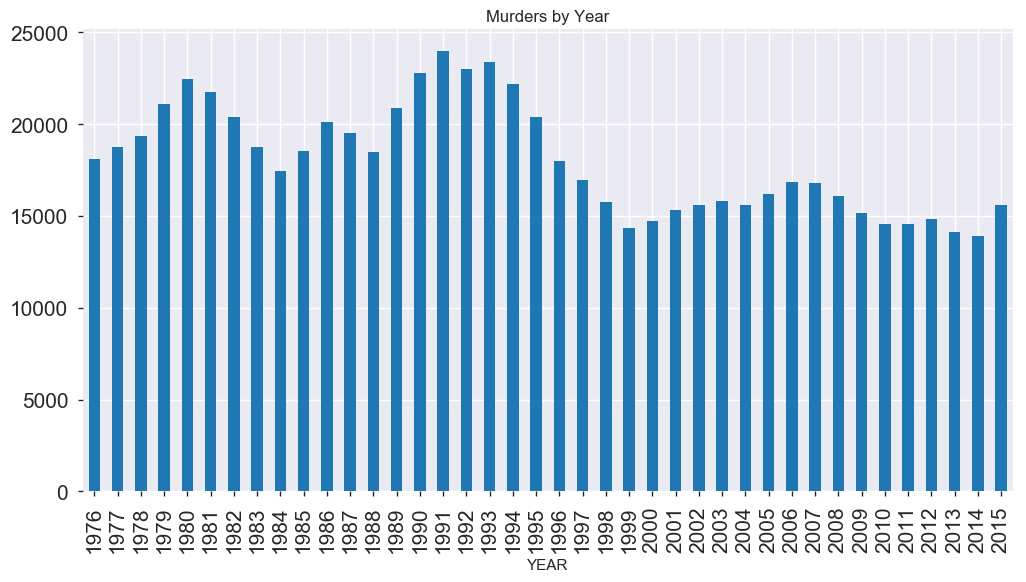

In [57]:
# Plot of murders by year
ucr.groupby('YEAR').MRD.sum().plot("bar",figsize=(12,6), fontsize=15,title="Murders by Year")

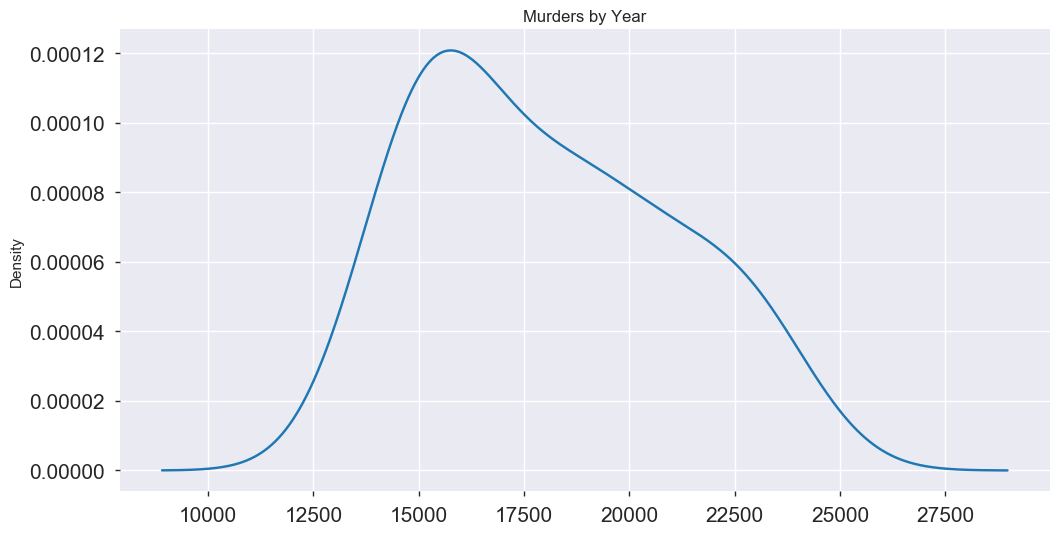

In [58]:
# Kernel density estimation plot of murder by year
ucr.groupby('YEAR').MRD.sum().plot("kde",figsize=(12,6), fontsize=15,title="Murders by Year")

In [27]:
# Cleared cases by year
ucr.groupby('YEAR').CLR.sum()

YEAR
1976    14519
1977    14077
1978    14738
1979    15507
1980    16147
1981    15406
1982    13800
1983    13603
1984    12894
1985    12795
1986    14019
1987    13167
1988    12588
1989    12602
1990    14963
1991    15020
1992    14732
1993    14824
1994    13780
1995    11765
1996    10531
1997    10286
1998     9866
1999     8991
2000     8598
2001     8746
2002     9099
2003     8849
2004     8774
2005     9097
2006     9185
2007     9250
2008     9381
2009     8950
2010     8419
2011     8388
2012     8366
2013     8614
2014     8510
2015     9141
Name: CLR, dtype: int64

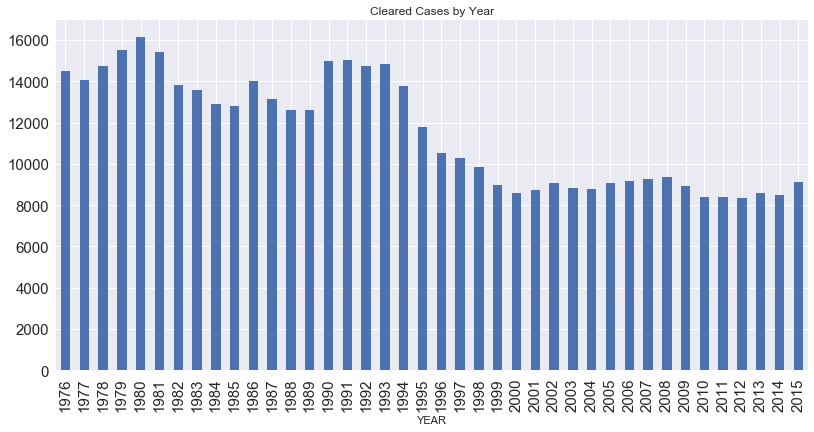

In [28]:
# Plot of cleared cases by year
ucr.groupby('YEAR').CLR.sum().plot("bar",figsize=(12,6), fontsize=15,title="Cleared Cases by Year")

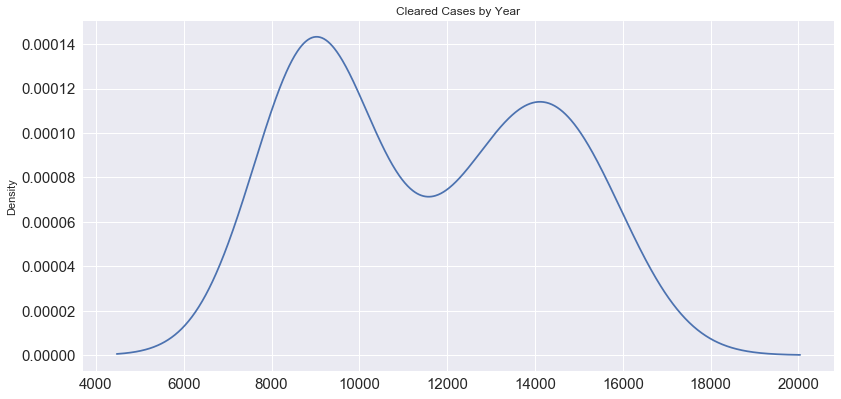

In [29]:
# Kernel density estimation plot of cleared cases by year
ucr.groupby('YEAR').CLR.sum().plot("kde",figsize=(12,6), fontsize=15,title="Cleared Cases by Year")

In [62]:
# Murder counts by state
ucr.groupby('State').MRD.sum()

State
Alabama                  15137
Alaska                    1696
Arizona                  13310
Arkansas                  7649
California              105493
Colorado                  7035
Connecticut               5366
Delaware                  1354
District of Columbia      9658
Florida                  42513
Georgia                  25240
Hawaii                    1530
Idaho                     1329
Illinois                 34899
Indiana                  13082
Iowa                      2088
Kansas                    4135
Kentucky                  8077
Louisiana                22723
Maine                      989
Maryland                 18367
Massachusetts             7005
Michigan                 31653
Minnesota                 4487
Mississippi               7567
Missouri                 16519
Montana                    919
Nebraska                  2066
Nevada                    5777
New Hampshire              690
New Jersey               15647
New Mexico                4936
Ne

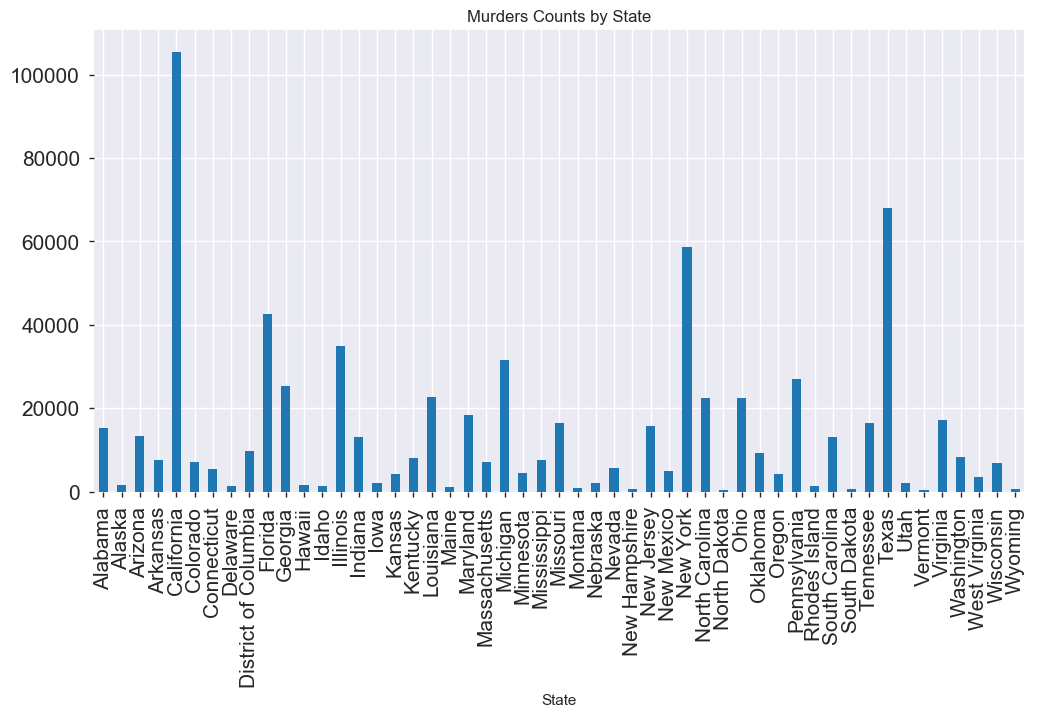

In [63]:
ucr.groupby('State').MRD.sum().plot("bar",figsize=(12,6), fontsize=15,title="Murders Counts by State")

In [30]:
# Cleared cases by state
ucr.groupby('State').CLR.sum()

State
Alabama                  8973
Alaska                   1271
Arizona                  8291
Arkansas                 6059
California              64003
Colorado                 4714
Connecticut              3844
Delaware                  965
District of Columbia     5539
Florida                 26541
Georgia                 15522
Hawaii                    973
Idaho                    1079
Illinois                 9047
Indiana                  7534
Iowa                     1525
Kansas                   2476
Kentucky                 5853
Louisiana               14420
Maine                     806
Maryland                12097
Massachusetts            4218
Michigan                16233
Minnesota                2833
Mississippi              5382
Missouri                11876
Montana                   593
Nebraska                 1681
Nevada                   3777
New Hampshire             454
New Jersey              10722
New Mexico               3213
New York                33924
Nort

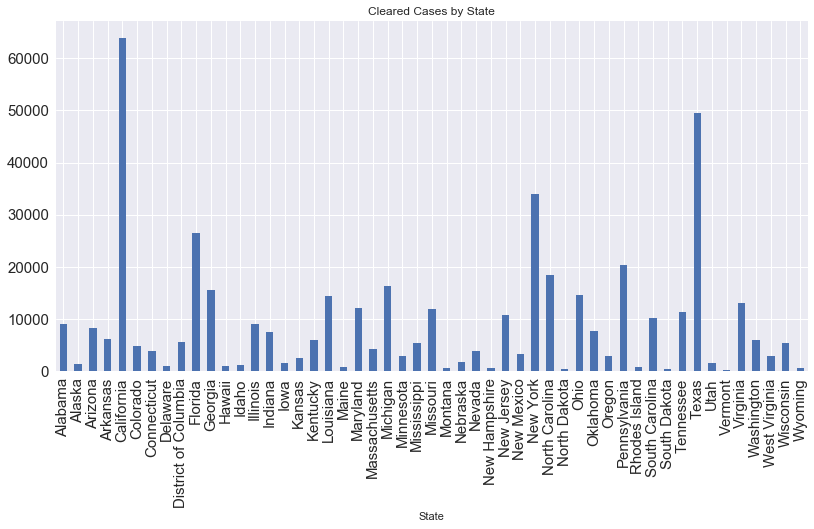

In [31]:
ucr.groupby('State').CLR.sum().plot("bar",figsize=(12,6), fontsize=15,title="Cleared Cases by State")

In [15]:
## ** IS IT REALLY VALUABLE??? ** 
ucr.groupby(['State','YEAR']).MRD.sum()

State    YEAR
Alabama  1965    267
         1966    239
         1967    272
         1968    295
         1969    320
         1970    258
         1971    342
         1972    323
         1973    344
         1974    402
         1975    522
         1976    541
         1977    524
         1978    488
         1979    480
         1980    503
         1981    442
         1982    407
         1983    357
         1984    367
         1985    389
         1986    397
         1987    377
         1988    383
         1989    405
         1990    453
         1991    439
         1992    415
         1993    470
         1994    493
                ... 
Wyoming  1986     27
         1987     10
         1988     12
         1989     21
         1990     22
         1991     15
         1992     17
         1993     17
         1994     16
         1995     10
         1996     18
         1997     17
         1998     14
         1999     11
         2000     12
         2001      9

In [73]:
# Murders by county
ucr.groupby('County').MRD.sum()

County
Abbeville, SC            68
Acadia, LA              139
Accomack, VA            102
Ada, ID                 225
Adair, IA                 2
Adair, KY                62
Adair, MO                17
Adair, OK                58
Adams, CO               501
Adams, IA                 7
Adams, ID                 4
Adams, IL                53
Adams, IN                 4
Adams, MS               141
Adams, ND                 3
Adams, NE                18
Adams, OH                16
Adams, PA                76
Adams, WA                36
Adams, WI                20
Addison, VT              30
Aiken, SC               430
Aitkin, MN               13
Alachua, FL             423
Alamance, NC            308
Alameda, CA            5774
Alamosa, CO              29
Albany, NY              391
Albany, WY               29
Albemarle, VA            95
                       ... 
Wyoming, NY              45
Wyoming, PA              30
Wyoming, WV              59
Wythe, VA                39
Yadkin, NC   

In [32]:
# Cleared cases by county
ucr.groupby('County').CLR.sum()

County
Abbeville, SC            57
Acadia, LA              101
Accomack, VA             75
Ada, ID                 194
Adair, IA                 2
Adair, KY                51
Adair, MO                16
Adair, OK                51
Adams, CO               347
Adams, IA                 5
Adams, ID                 3
Adams, IL                35
Adams, IN                 3
Adams, MS               107
Adams, ND                 2
Adams, NE                17
Adams, OH                11
Adams, PA                55
Adams, WA                25
Adams, WI                15
Addison, VT              25
Aiken, SC               319
Aitkin, MN               10
Alachua, FL             302
Alamance, NC            255
Alameda, CA            3150
Alamosa, CO              25
Albany, NY              302
Albany, WY               24
Albemarle, VA            87
                       ... 
Wyoming, NY              35
Wyoming, PA              31
Wyoming, WV              52
Wythe, VA                37
Yadkin, NC   